In [22]:
import GPy
import gp_estimator
import numpy as np
from pathos.multiprocessing import ProcessingPool as Pool
import time
import matplotlib.pyplot as plt

In [4]:
x = np.array([[1.4173, 1.7542, 2.4205, 2.8209, 2.6212, 2.6189],
 [1.8128, 1.8448, 2.7643, 3.2436, 3.5712, 2.4363],
 [2.2451, 1.9571, 3.3593, 3.7035, 4.4397, 2.623 ],
 [2.4004, 2.0771, 3.7938, 3.9861, 4.8271, 2.9528],
 [2.2137, 2.1878, 4.0329, 4.1219, 4.8105, 3.3443],
 [1.7594, 2.2757, 4.146 , 4.1705, 4.5603, 3.7561],
 [1.158 , 2.3336, 4.196 , 4.1815, 4.2258, 4.1517],])
y = np.array([[-1.0249],
 [-1.3607],
 [-1.6701],
 [-1.8286],
 [-1.6452],
 [-1.2904],
 [-0.8217],])
x_new = np.array([[ 1.7378,  1.9335,  2.1277,  2.6621,  2.0048,  2.7848],
 [ 2.0649,  2.0367,  2.3403,  3.3159,  3.2174,  2.4386],
 [ 2.473 ,  2.1604,  2.8817,  3.8815,  4.3108,  2.4523],
 [ 2.5843,  2.2896,  3.4357,  4.0919,  4.7825,  2.7451],
 [ 2.3347,  2.4063,  3.9313,  4.0816,  4.7727,  3.2402],
 [ 1.7906,  2.4958,  4.3495,  4.0158,  4.5279,  3.8375],
 [ 1.0604,  2.5489,  4.6644,  3.9925,  4.2369,  4.4201],
 [ 0.2672,  2.5622,  4.8285,  4.0669,  4.0415,  4.8539],
 [-0.4766,  2.5384,  4.8425,  4.2241,  4.0045,  5.0621],
 [-1.1024,  2.4833,  4.755 ,  4.407 ,  4.1233,  5.0386],
 [-1.5997,  2.4033,  4.631 ,  4.5476,  4.3466,  4.832 ],
 [-2.004 ,  2.3031,  4.5136,  4.5892,  4.5943,  4.5086],
 [-2.366 ,  2.1848,  4.4073,  4.4867,  4.7665,  4.1274],
 [ 1.7561,  1.9183,  2.0335,  2.7264,  2.184 ,  2.5728],])

In [23]:
x = np.array([[-1.9056,  0.1182,  2.6104,  3.5282,  2.5315,  3.0109],
 [-2.5688, -0.0103,  2.6317,  4.506 ,  2.8596,  3.7706],
 [-3.0518, -0.1629,  2.8984,  4.908 ,  3.2395,  4.0935],
 [-3.1745, -0.3216,  3.2941,  4.9233,  3.6239,  4.1523],
 [-2.9211, -0.4676,  3.7658,  4.7446,  3.994 ,  4.1074],
 [-2.3806, -0.5867,  4.2217,  4.5224,  4.2964,  4.0715],
 [-1.655 , -0.6694,  4.5896,  4.3319,  4.5018,  4.0763],] )
y = np.array([[2.0366],
 [2.6195],
 [2.9912],
 [2.9878],
 [2.5893],
 [1.9266],
 [1.0575],] )
z = np.array([[-2.0446,  0.0364,  2.1148,  3.5023,  2.1776 , 3.0332],
 [-2.8037, -0.1038,  2.2312,  4.3773,  2.4792 , 3.7838],
 [-3.2935, -0.2684,  2.6072,  4.6625,  2.8429 , 4.1067],
 [-3.3612, -0.4365,  3.1298,  4.59  ,  3.2445 , 4.1791],
 [-3.0314, -0.5881,  3.7246,  4.3742,  3.6671 , 4.1587],
 [-2.4054, -0.7083,  4.2885,  4.1615,  4.0561 , 4.1445],
 [-1.5832, -0.7875,  4.7347,  4.0164,  4.366  , 4.1591],
 [-0.6692, -0.821 ,  5.0003,  3.9635,  4.5663 , 4.1945],
 [ 0.2271, -0.8096,  5.0634,  3.9976,  4.6654 , 4.2154],
 [ 1.0155, -0.7588,  4.9405,  4.0916,  4.6842 , 4.1902],
 [ 1.6463, -0.6765,  4.6675,  4.2026,  4.6351 , 4.0995],
 [ 2.1099, -0.571 ,  4.2807,  4.2791,  4.523  , 3.923 ],
 [ 2.4192, -0.4501,  3.8187,  4.2522,  4.325  , 3.6532],
 [-2.0276,  0.0707,  2.1616,  3.5417,  2.2261 , 3.0328],])

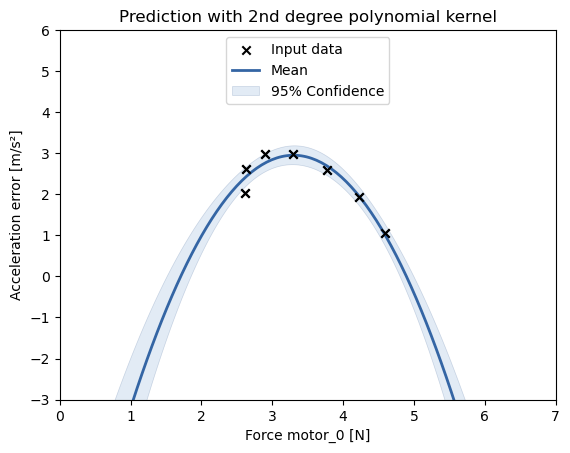

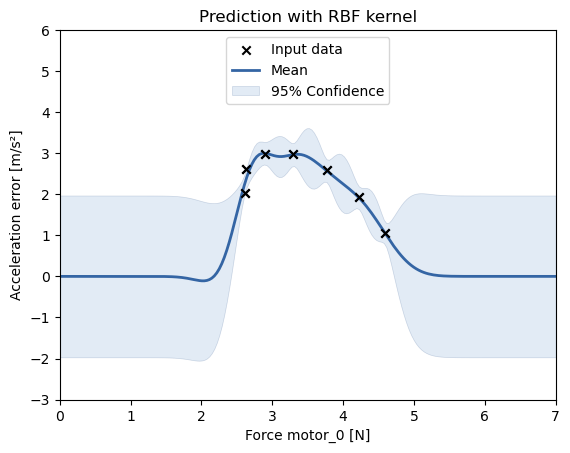

In [35]:
# for motor 0
k2 = GPy.kern.Poly(input_dim=1, variance=0.1, order=2, scale=40, bias=135, active_dims=[0])
k3 = GPy.kern.RBF(input_dim=1, variance=[1], active_dims=[0], lengthscale=0.3, ARD=True)


def gp_poly(x_lim,y_lim):
    
    dim = 0
    x1 = x[:,2].reshape(-1,1)
    m2 = GPy.models.GPRegression(x1, y, k2)
    m2.Gaussian_noise.variance = 0.01
    m2.Gaussian_noise.variance.fix()
    m2.optimize(optimizer='scg', max_iters=10)


    mean, var = m2.predict(x1)
    

    fig, ax = plt.subplots()

    ax.set_xlabel('Force motor_0 [N]')
    ax.set_ylabel('Acceleration error [m/s²]')

    vis_dim = 0
    m2.plot(ax=ax, plot_limits=x_lim, zorder=2, visible_dims=[vis_dim])
    m2.plot_data(ax=ax, zorder=10, visible_dims=[vis_dim])
    ax.legend(['Input data', 'Mean', '95% Confidence'], loc='upper center')
    ax.set_title('Prediction with 2nd degree polynomial kernel')
    ax.set_ylim(y_lim)
    #fig.savefig('gp_m0_acc_poly_kernel.pdf', format='pdf')

def gp_rbf(x_lim,y_lim):
    
    dim = 0
    x1 = x[:,2].reshape(-1,1)
    m2 = GPy.models.GPRegression(x1, y, k3)
    m2.Gaussian_noise.variance = 0.01
    m2.Gaussian_noise.variance.fix()
    #m2.optimize(optimizer='scg', max_iters=1)


    mean, var = m2.predict(x1)
    

    fig, ax = plt.subplots()

    ax.set_xlabel('Force motor_0 [N]')
    ax.set_ylabel('Acceleration error [m/s²]')

    vis_dim = 0
    m2.plot(ax=ax, plot_limits=x_lim, zorder=2, visible_dims=[vis_dim])
    m2.plot_data(ax=ax, zorder=10, visible_dims=[vis_dim])
    ax.legend(['Input data', 'Mean', '95% Confidence'], loc='upper center')
    ax.set_title('Prediction with RBF kernel')
    ax.set_ylim(y_lim)
    #fig.savefig('gp_m0_acc_rbf_kernel.pdf', format='pdf')
    
x_lim = (0,7)
y_lim = (-3,6)
gp_poly(x_lim,y_lim)
gp_rbf(x_lim,y_lim)
    
#fig.savefig('gp_vel_acc_poly_kernel', format='pdf')


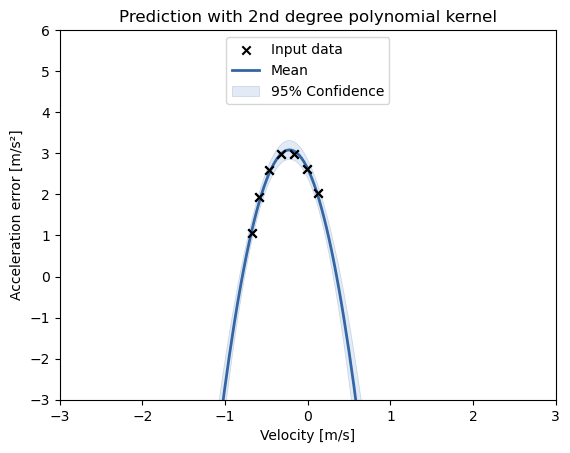

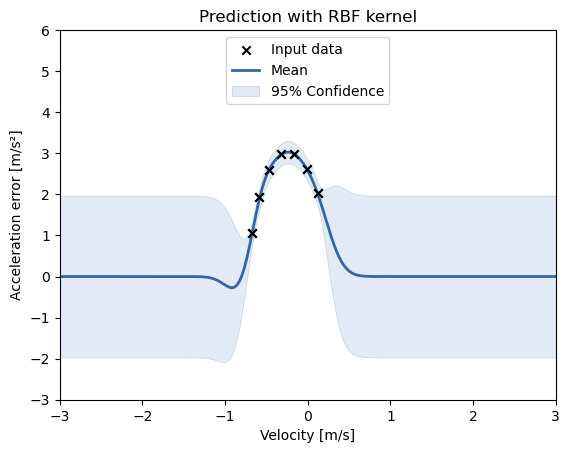

In [27]:
# for velocity
k2 = GPy.kern.Poly(input_dim=1, variance=0.1, order=2, scale=40, bias=135, active_dims=[0])
k3 = GPy.kern.RBF(input_dim=1, variance=[1], active_dims=[0], lengthscale=0.18, ARD=True)


def gp_poly(x_lim,y_lim):
    
    dim = 0
    x1 = x[:,1].reshape(-1,1)
    m2 = GPy.models.GPRegression(x1, y, k2)
    m2.Gaussian_noise.variance = 0.01
    m2.Gaussian_noise.variance.fix()
    m2.optimize(optimizer='scg', max_iters=10)


    mean, var = m2.predict(x1)
    

    fig, ax = plt.subplots()

    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('Acceleration error [m/s²]')

    vis_dim = 0
    m2.plot(ax=ax, plot_limits=x_lim, zorder=2, visible_dims=[vis_dim])
    m2.plot_data(ax=ax, zorder=10, visible_dims=[vis_dim])
    ax.legend(['Input data', 'Mean', '95% Confidence'], loc='upper center')
    ax.set_title('Prediction with 2nd degree polynomial kernel')
    ax.set_ylim(y_lim)
    #fig.savefig('gp_vel_acc_poly_kernel.pdf', format='pdf')

def gp_rbf(x_lim,y_lim):
    
    dim = 0
    x1 = x[:,1].reshape(-1,1)
    m2 = GPy.models.GPRegression(x1, y, k3)
    m2.Gaussian_noise.variance = 0.01
    m2.Gaussian_noise.variance.fix()
    #m2.optimize(optimizer='scg', max_iters=1)


    mean, var = m2.predict(x1)
    

    fig, ax = plt.subplots()

    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('Acceleration error [m/s²]')

    vis_dim = 0
    m2.plot(ax=ax, plot_limits=x_lim, zorder=2, visible_dims=[vis_dim])
    m2.plot_data(ax=ax, zorder=10, visible_dims=[vis_dim])
    ax.legend(['Input data', 'Mean', '95% Confidence'], loc='upper center')
    ax.set_title('Prediction with RBF kernel')
    ax.set_ylim(y_lim)
    #fig.savefig('gp_vel_acc_rbf_kernel.pdf', format='pdf')
    
x_lim = (-3,3)
y_lim = (-3,6)
gp_poly(x_lim,y_lim)
gp_rbf(x_lim,y_lim)
    
#fig.savefig('gp_vel_acc_poly_kernel', format='pdf')


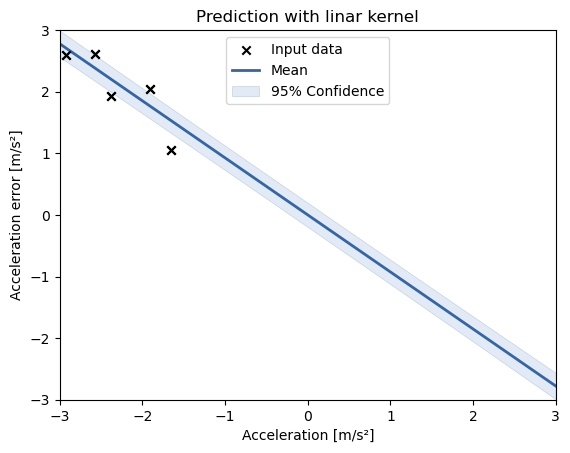

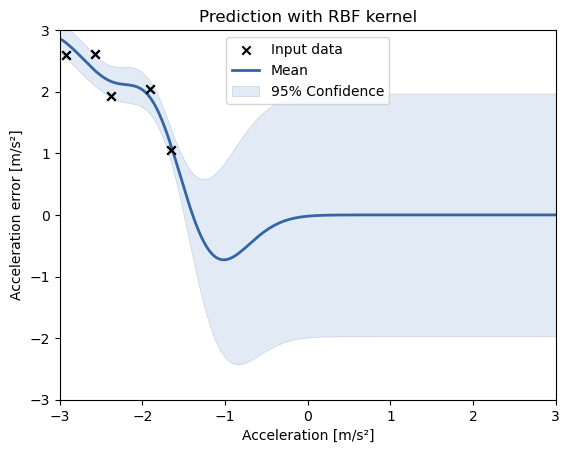

In [30]:
# for acceleration
k2 = GPy.kern.Linear(input_dim= 1)
k3 = GPy.kern.RBF(input_dim=1, variance=[1], active_dims=[0], lengthscale=0.5, ARD=True)


def gp_lin(x_lim,y_lim):
    
    dim = 0
    x1 = x[:,0].reshape(-1,1)
    m2 = GPy.models.GPRegression(x1, y, k2)
    m2.Gaussian_noise.variance = 0.01
    m2.Gaussian_noise.variance.fix()
    m2.optimize(optimizer='scg', max_iters=10)


    mean, var = m2.predict(x1)
    

    fig, ax = plt.subplots()

    ax.set_xlabel('Acceleration [m/s²]')
    ax.set_ylabel('Acceleration error [m/s²]')

    vis_dim = 0
    m2.plot(ax=ax, plot_limits=x_lim, zorder=2, visible_dims=[vis_dim])
    m2.plot_data(ax=ax, zorder=10, visible_dims=[vis_dim])
    ax.legend(['Input data', 'Mean', '95% Confidence'], loc='upper center')
    ax.set_title('Prediction with linar kernel')
    ax.set_ylim(y_lim)
    #fig.savefig('gp_acc_acc_linear_kernel.pdf', format='pdf',bbox_inches='tight',pad_inches=0)

def gp_rbf(x_lim,y_lim):
    
    dim = 0
    x1 = x[:,0].reshape(-1,1)
    m2 = GPy.models.GPRegression(x1, y, k3)
    m2.Gaussian_noise.variance = 0.01
    m2.Gaussian_noise.variance.fix()
    #m2.optimize(optimizer='scg', max_iters=1)


    mean, var = m2.predict(x1)
    

    fig, ax = plt.subplots()

    ax.set_xlabel('Acceleration [m/s²]')
    ax.set_ylabel('Acceleration error [m/s²]')

    vis_dim = 0
    m2.plot(ax=ax, plot_limits=x_lim, zorder=2, visible_dims=[vis_dim])
    m2.plot_data(ax=ax, zorder=10, visible_dims=[vis_dim])
    ax.legend(['Input data', 'Mean', '95% Confidence'], loc='upper center')
    ax.set_title('Prediction with RBF kernel')
    ax.set_ylim(y_lim)
    #fig.savefig('gp_acc_acc_rbf_kernel.pdf', format='pdf',bbox_inches='tight',pad_inches=0)
    
x_lim = (-3,3)
y_lim = (-3,3)
gp_lin(x_lim,y_lim)
gp_rbf(x_lim,y_lim)



[[-1.0249]
 [-1.3607]
 [-1.6701]
 [-1.8286]
 [-1.6452]
 [-1.2904]
 [-0.8217]]
[[-1.0535732 ]
 [-1.34766022]
 [-1.66911109]
 [-1.78458951]
 [-1.64576259]
 [-1.3079529 ]
 [-0.86076216]]

Name : GP regression
Objective : -5.320213545964641
Number of Parameters : 8
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  sum.linear.variances     |     0.5507624911968756  |      +ve      |        
  sum.poly.variance        |                    1.0  |   +ve fixed   |        
  sum.poly.scale           |  2.384723191727606e-08  |      +ve      |        
  sum.poly.bias            |   0.007423062577777669  |      +ve      |        
  sum.poly_1.variance      |                    1.0  |   +ve fixed   |        
  sum.poly_1.scale         |  2.337330001629928e-09  |      +ve      |        
  sum.poly_1.bias          |   0.007429983804274208  |      +ve      |        
  Gaussian_noise.variance  |             

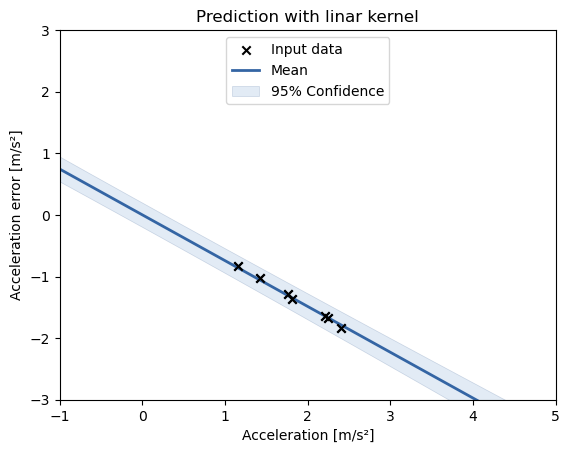

In [18]:
k1 = GPy.kern.Linear(input_dim= 1, active_dims=[0])
k2 = GPy.kern.Poly(input_dim=1, variance=1, order=2, scale=40, bias=135, active_dims=[1])
k3 = GPy.kern.Poly(input_dim=1, variance=1, order=2, scale=40, bias=135, active_dims=[2])



k2.variance.fix()
k3.variance.fix()

dim = 0
x1 = x[:,:3]
m2 = GPy.models.GPRegression(x1, y, k1+k2+k3)
m2.Gaussian_noise.variance = 0.01
m2.Gaussian_noise.variance.fix()
m2.optimize(optimizer='scg', max_iters=1000)


mean, var = m2.predict(x1)
print(y)
print(mean)

fig, ax = plt.subplots()

ax.set_xlabel('Acceleration [m/s²]')
ax.set_ylabel('Acceleration error [m/s²]')

vis_dim = 0
m2.plot(ax=ax, plot_limits=x_lim, zorder=2, visible_dims=[vis_dim])
m2.plot_data(ax=ax, zorder=10, visible_dims=[vis_dim])
ax.legend(['Input data', 'Mean', '95% Confidence'], loc='upper center')
ax.set_title('Prediction with linar kernel')
ax.set_ylim(y_lim)
print(m2)

In [13]:
x1 = np.array([[ 1.8163, -0.7765,  2.8477,  2.3214,  3.0905,  2.0754],
               [-3.688 , -0.9609,  2.9662,  2.8543,  2.4592,  3.3608],
               [-6.3079, -1.2762,  3.0762,  3.6988,  2.2166,  4.5584],
               [-4.1637, -1.4844,  2.9548,  4.4366,  2.3948,  4.9966],
               [ 1.3608, -1.4164,  2.7686,  4.9213,  2.9697,  4.7202],
               [ 7.3917, -1.0468,  2.7733,  5.0768,  3.8032,  4.0469],
               [12.9586, -0.3989,  2.953 ,  5.0609,  4.7445,  3.2694],])
y1 = np.array([[-2.4314],
               [ 4.4331],
               [ 8.0266],
               [ 6.7822],
               [ 2.2537],
               [-3.092 ],
               [-8.1728],])
x1_new = np.array([[ 6.8588,  0.3292,  2.5512,  3.0582,  3.4792,  2.1194],
                  [-1.2226,  0.268 ,  2.6794,  3.4001,  2.5114,  3.5651],
                  [-6.5556, -0.0597,  2.9089,  3.9166,  2.0169,  4.8078],
                  [-6.6873, -0.3941,  3.0067,  4.223 ,  2.0986,  5.131 ],
                  [-2.8274, -0.5355,  3.0943,  4.2603,  2.7133,  4.6412],
                  [ 2.387 , -0.4161,  3.3034,  4.1278,  3.6333,  3.7979],
                  [ 7.4942, -0.0414,  3.3006,  4.3267,  4.3256,  3.3016],
                  [10.694 ,  0.4933,  3.2624,  4.7226,  4.7228,  3.2622],
                  [11.1182,  1.0492,  3.635 ,  4.8076,  5.1531,  3.2895],
                  [ 8.7115,  1.4848,  4.6593,  4.2167,  5.8489,  3.027 ],
                  [ 4.4693,  1.7082,  5.5999,  3.551 ,  6.2102,  2.9408],
                  [ 1.457 ,  1.7811,  5.9958,  3.176 ,  6.1942,  2.9776],
                  [ 0.0447,  1.7833,  5.7548,  3.1336,  5.7601,  3.1283],
                  [ 6.8234,  0.0977,  2.5536,  3.0105,  3.4733,  2.0742],])
mean_y = np.mean(y1)
y1 = y1 - mean_y

In [14]:
k = GPy.kern.Linear(input_dim=1, variances=[1], active_dims=[0], ARD=True)
k1 = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1, active_dims=[0], ARD=True)
#k4 = GPy.kern.Poly(input_dim=1, variance=0.1, order=2, scale=40, bias=135, active_dims=[1])
#k2.variance.fix()
#k2.scale.fix()
#k2.bias.fix()
m = GPy.models.GPRegression(x1, y1, k)
m2.Gaussian_noise.variance = 0.01
m2.Gaussian_noise.variance.fix()

 /home/vscode/.local/lib/python3.10/site-packages/GPy/core/gp.py:85: UserWarning:Your kernel has a different input dimension 1 then the given X dimension 6. Be very sure this is what you want and you have not forgotten to set the right input dimenion in your kernel


array([0])


Name : GP regression
Objective : 16.507947172881277
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  linear.variances         |  0.6134964298062884  |      +ve      |        
  Gaussian_noise.variance  |  3.7334619192577945  |      +ve      |        
[[-0.29201083]
 [ 3.96951331]
 [ 5.99788514]
 [ 4.33780846]
 [ 0.06064513]
 [-4.60858182]
 [-8.91857196]]
[[-3.5456]
 [ 3.3189]
 [ 6.9124]
 [ 5.668 ]
 [ 1.1395]
 [-4.2062]
 [-9.287 ]]


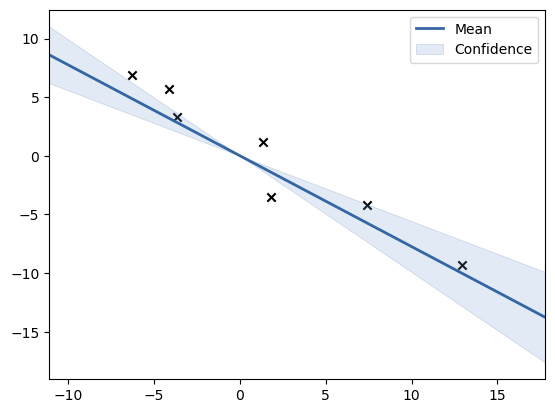

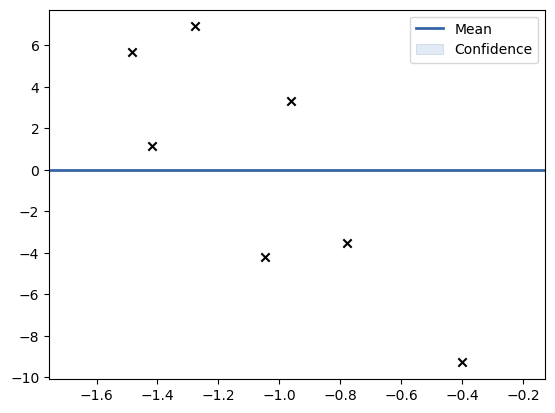

In [15]:
m.optimize(optimizer='scg', max_iters=100)
mean, var = m.predict(x1)

fig, ax = plt.subplots()
#GP.models[0].plot_confidence(visible_dims=[0], projection='2d', ax=ax)
m.plot_data(visible_dims=[0], projection='2d', ax=ax)
m.plot_f(   visible_dims=[0], projection='2d', ax=ax)

fig2, ax2 = plt.subplots()
#GP.models[0].plot_confidence(visible_dims=[0], projection='2d', ax=ax)
m.plot_data(visible_dims=[1], projection='2d', ax=ax2)
m.plot_f(   visible_dims=[1], projection='2d', ax=ax2)

#m2.plot_data( ax=ax)
#m2.plot_f( ax=ax   )

print(m)
print(mean+mean_y)
print(y1)

In [8]:
GP = gp_estimator.GP_estimator()





reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.leng

reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale
reconstraining parameters rbf.lengthscale


{'gpmean': [[<matplotlib.lines.Line2D at 0x7942b04ffa60>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7942b04ffc70>]}

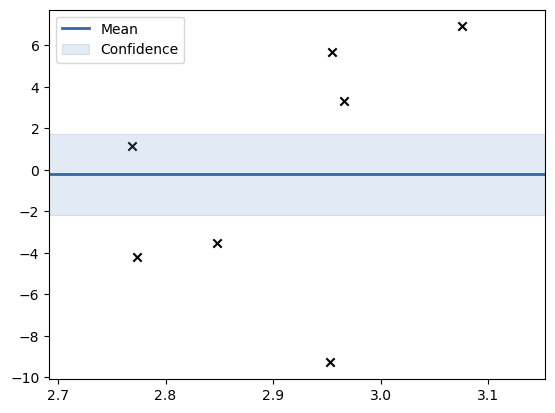

In [19]:
for i in range(100):

    GP.predict_accel(x1, y1, x1_new, axis=3, optimize=True)
fig, ax = plt.subplots()
#GP.models[0].plot_confidence(visible_dims=[0], projection='2d', ax=ax)
GP.models[3].plot_data(visible_dims=[2], projection='2d', ax=ax)
GP.models[3].plot_f(   visible_dims=[2], projection='2d', ax=ax)